## Предобработка данных и логистическая регрессия для задачи бинарной классификации

## Programming assignment

предобработка данных и обучение модели логистической регрессии

In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

## Описание датасета

Задача: по 38 признакам, связанных с заявкой на грант (область исследований учёных, информация по их академическому бэкграунду, размер гранта, область, в которой он выдаётся) предсказать, будет ли заявка принята. Датасет включает в себя информацию по 6000 заявкам на гранты, которые были поданы в университете Мельбурна в период с 2004 по 2008 год.

Полную версию данных с большим количеством признаков можно найти на https://www.kaggle.com/c/unimelb.

In [4]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

Выделим из датасета целевую переменную Grant.Status и обозначим её за y
Теперь X обозначает обучающую выборку, y - ответы на ней

In [5]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

## Предобработка данных

Из свойств данной модели следует, что:
- все $X$ должны быть числовыми данными
- среди $X$ не должно быть пропущенных значений

In [6]:
data.head(100)

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0
5,1,288D,30B,A,321105.0,100.0,0.0,0.0,0.0,0.0,...,2568.0,25.0,Yes,>=0 to 5,0.0,4.0,0.0,1.0,0.0,2.0
6,1,21A,50A,A,380205.0,40.0,379902.0,30.0,380102.0,30.0,...,593.0,7.0,Yes,>5 to 10,1.0,0.0,1.0,2.0,6.0,0.0
7,1,2B,10A,D,410302.0,40.0,420306.0,30.0,379999.0,30.0,...,528.0,7.0,Yes,more than 15,0.0,1.0,0.0,2.0,3.0,2.0
8,1,34B,30C,A,270401.0,100.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,C,270802.0,100.0,0.0,0.0,0.0,0.0,...,2578.0,25.0,Yes,more than 15,3.0,1.0,7.0,21.0,31.0,15.0


списки названий:

In [7]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

исключение всех данных, у которых пропущено хотя бы одно значение

In [8]:
data.dropna().shape

(213, 39)

ушли почти все данные  --> и такой метод решения в данном случае не сработает

Тогда:

Для вещественных признаков:
- заменить на 0
- заменить на среднее

Для категориальных:
- интерпретировать пропущенное значение, как ещё одну категорию

## Обработка пропущенных значений.

In [9]:
data[numeric_cols].shape[0]

6000

In [10]:
def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(~numeric_data.iloc[:,j].isnull())[0]
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

примечание:

~ - инвентирует True и False

indices - это, соответственно, индексы всех непустых элементов

In [11]:
# среднее
means = calculate_means(X[numeric_cols])

In [12]:
means

RFCD.Percentage.1                   74.832348
RFCD.Percentage.2                   17.677593
RFCD.Percentage.3                    6.933011
RFCD.Percentage.4                    0.437937
RFCD.Percentage.5                    0.119112
SEO.Percentage.1                    71.483240
SEO.Percentage.2                    20.646880
SEO.Percentage.3                     6.926704
SEO.Percentage.4                     0.730804
SEO.Percentage.5                     0.212192
Year.of.Birth.1                   1962.449849
Number.of.Successful.Grant.1         1.177849
Number.of.Unsuccessful.Grant.1       2.097977
dtype: float64

In [13]:
X_real_zeros = X.drop(categorical_cols, 1)
for mark in numeric_cols:
    ind_NaN = np.nonzero(X_real_zeros.loc[:, mark].isnull())[0]
    for i in ind_NaN:
        X_real_zeros.loc[i, (mark)] = 0

In [14]:
X.head(29)

,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,0.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,0.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0
5,288D,30B,A,321105.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2568.0,25.0,Yes,>=0 to 5,0.0,4.0,0.0,1.0,0.0,2.0
6,21A,50A,A,380205.0,40.0,379902.0,30.0,380102.0,30.0,0.0,...,593.0,7.0,Yes,>5 to 10,1.0,0.0,1.0,2.0,6.0,0.0
7,2B,10A,D,410302.0,40.0,420306.0,30.0,379999.0,30.0,0.0,...,528.0,7.0,Yes,more than 15,0.0,1.0,0.0,2.0,3.0,2.0
8,34B,30C,A,270401.0,100.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,C,270802.0,100.0,0.0,0.0,0.0,0.0,0.0,...,2578.0,25.0,Yes,more than 15,3.0,1.0,7.0,21.0,31.0,15.0


In [15]:
X_real_zeros.head(29)

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0
5,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1960.0,0.0,4.0
6,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1950.0,1.0,0.0
7,40.0,30.0,30.0,0.0,0.0,40.0,30.0,30.0,0.0,0.0,1955.0,0.0,1.0
8,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1945.0,3.0,1.0


In [16]:
X_real_mean = X.drop(categorical_cols, 1)
for mark in numeric_cols:
    ind_NaN = np.nonzero(X_real_mean.loc[:, mark].isnull())[0]
    for i in ind_NaN:
        X_real_mean.loc[i, (mark)] = means[mark]

In [17]:
X_real_mean.head(29)

,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.000000,30.000000,20.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.000000,2.000000,0.000000
1,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.000000,3.000000,1.000000
2,50.000000,30.000000,20.000000,0.000000,0.000000,60.00000,20.00000,20.000000,0.000000,0.000000,1955.000000,1.000000,5.000000
3,60.000000,40.000000,0.000000,0.000000,0.000000,60.00000,40.00000,0.000000,0.000000,0.000000,1950.000000,2.000000,1.000000
4,100.000000,0.000000,0.000000,0.000000,0.000000,50.00000,50.00000,0.000000,0.000000,0.000000,1970.000000,0.000000,2.000000
5,100.000000,0.000000,0.000000,0.000000,0.000000,50.00000,50.00000,0.000000,0.000000,0.000000,1960.000000,0.000000,4.000000
6,40.000000,30.000000,30.000000,0.000000,0.000000,40.00000,30.00000,30.000000,0.000000,0.000000,1950.000000,1.000000,0.000000
7,40.000000,30.000000,30.000000,0.000000,0.000000,40.00000,30.00000,30.000000,0.000000,0.000000,1955.000000,0.000000,1.000000
8,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1962.449849,1.177849,2.097977
9,100.000000,0.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1945.000000,3.000000,1.000000


In [18]:
X_real_mean.shape

(6000, 13)

In [19]:
X_cat = X.drop(numeric_cols, 1)
for mark in categorical_cols:
    ind_NaN = np.nonzero(X_cat.loc[:, mark].isnull())[0]
    for i in ind_NaN:
        X_cat.loc[i, (mark)] = 'NA'
X_cat = X_cat.applymap(lambda x: str(x))

In [20]:
# проверяем преобразование в строку
print type(X_cat.iloc[1, 3])
X_cat.iloc[1, 3]

<type 'str'>


'320801.0'

## Преобразование категориальных признаков.

преобразуем категориальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц

тест:

In [21]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

  nationality     sex
0    American    male
1    European  female
2       Asian    male
3    European  female

Закодированные данные:

[[ 1.  0.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]
 [ 0.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]]


In [22]:
categorial_data.T.to_dict().values()

[{'nationality': 'American', 'sex': 'male'},
 {'nationality': 'European', 'sex': 'female'},
 {'nationality': 'Asian', 'sex': 'male'},
 {'nationality': 'European', 'sex': 'female'}]

In [23]:
categorial_data.T.to_dict()

{0: {'nationality': 'American', 'sex': 'male'},
 1: {'nationality': 'European', 'sex': 'female'},
 2: {'nationality': 'Asian', 'sex': 'male'},
 3: {'nationality': 'European', 'sex': 'female'}}

In [24]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

In [25]:
X_cat_oh.shape
print X_cat_oh.shape, '\n'*2, X_cat_oh

(6000L, 5593L) 

[[ 1.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  1.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 1.  0.  0. ...,  1.  1.  0.]
 [ 1.  0.  0. ...,  0.  1.  0.]]


делим исходный датасет на обучающую и тестовую выборки

In [26]:
from sklearn.cross_validation import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Описание классов

функционал по подбору гиперпараметров модели
    
    optimizer = GridSearchCV(estimator, param_grid)

где:
- estimator - обучающий алгоритм, для которого будет производиться подбор параметров
- param_grid - словарь параметров, ключами которого являются строки-названия, которые передаются алгоритму estimator, а значения - набор параметров для перебора

Опциональные параметры вызова данного класса:
- scoring - функционал качества, максимум которого ищется кросс валидацией, по умолчанию используется функция score() класса esimator
- n_jobs - позволяет ускорить кросс-валидацию, выполняя её параллельно, число определяет количество одновременно запущенных задач
- cv - количество фолдов, на которые разбивается выборка при кросс-валидации

После инициализации класса GridSearchCV:

    optimizer.fit(X, y)
    
На выходе

    optimizer.predict(X)
    
для меток или

    optimizer.predict_proba(X)
    
для вероятностей.
    
Оптимальный класс estimator и оптимальные параметры:
- best\_estimator\_ - лучший алгоритм
- best\_params\_ - лучший набор параметров

Класс логистической регрессии:

    estimator = LogisticRegression(penalty)
   
где penalty принимает либо значение 'l2', либо 'l1'. По умолчанию 'l2'.

## 1. Сравним способы заполнения вещественных пропущенных значений


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    

        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
# делаем обучающую выборку
X_train_zeros_cat = np.hstack([X_train_real_zeros, X_train_cat_oh])
X_train_mean_cat = np.hstack([X_train_real_mean, X_train_cat_oh])

# делаем тестовую выборку
X_test_zeros_cat = np.hstack([X_test_real_zeros, X_test_cat_oh])
X_test_mean_cat = np.hstack([X_test_real_mean, X_test_cat_oh])

In [29]:
# контроль
X_test_zeros_cat

array([[  80.,   20.,    0., ...,    0.,    0.,    1.],
       [   0.,    0.,    0., ...,    0.,    1.,    0.],
       [ 100.,    0.,    0., ...,    0.,    0.,    1.],
       ..., 
       [  40.,   40.,   20., ...,    0.,    0.,    1.],
       [  40.,   30.,   30., ...,    0.,    0.,    1.],
       [ 100.,    0.,    0., ...,    0.,    0.,    1.]])

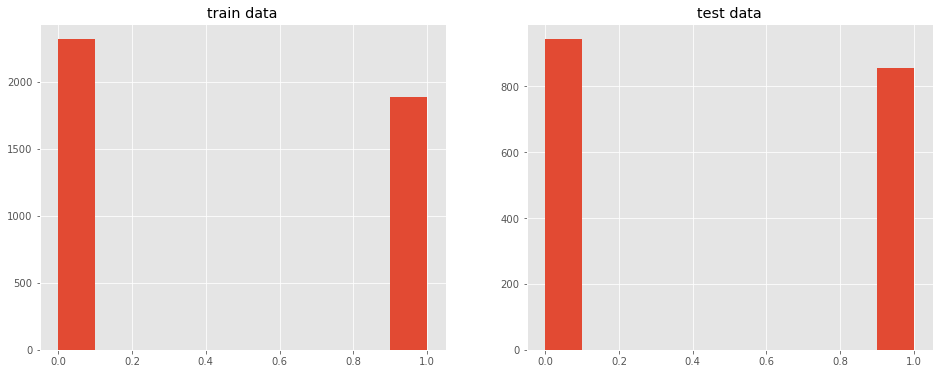

In [30]:
plt.figure(figsize = (16, 6))

plt.subplot(1,2,1)
plt.hist(y_train)
plt.title('train data')

plt.subplot(1,2,2)
plt.hist(y_test)
plt.title('test data')

## тестируем выборку с нулями вместо пропусков

In [31]:
estimator = LogisticRegression()

In [32]:
optimizer = GridSearchCV(estimator, param_grid, cv=3)

In [52]:
optimazer_zeros = optimizer.fit(X_train_zeros_cat, y_train)

In [43]:
optimazer_zeros.best_estimator_

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
[optimizer.grid_scores_[i][1] for i in range(7)]

[0.7807142857142857,
 0.795,
 0.7930952380952381,
 0.789047619047619,
 0.7842857142857143,
 0.7752380952380953,
 0.768095238095238]

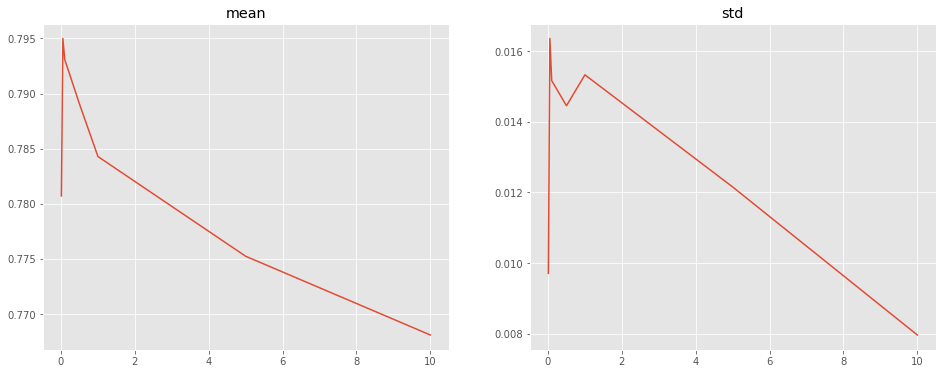

In [45]:
# строим графики: значение метрики и ошибка. Визуализируем максимум.

# метрика
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
plt.plot([optimizer.grid_scores_[i][0].values() for i in range(7)], [optimizer.grid_scores_[i][1] for i in range(7)])
plt.title('mean')

# ошибка
plt.subplot(1,2,2)
plt.plot([optimizer.grid_scores_[i][0].values() for i in range(7)], [optimizer.grid_scores_[i][2].std() for i in range(7)])
plt.title('std')

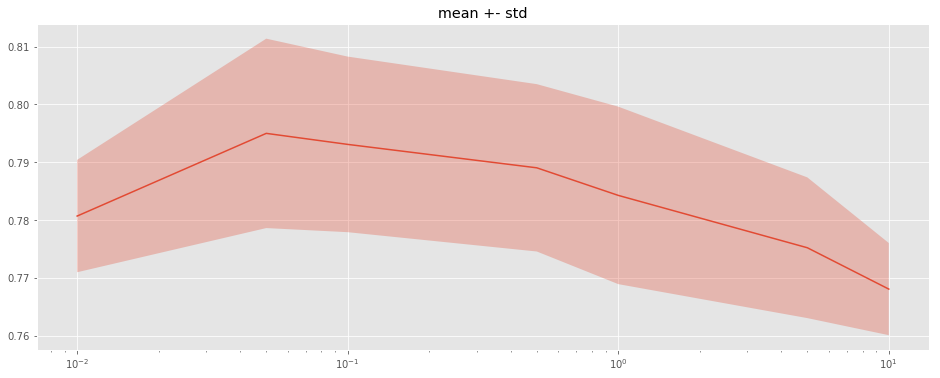

In [46]:
plot_scores_My(optimizer)

## тестируем выборку со средними вместо пропусков

In [49]:
# обучаем

optimizer_mean = optimizer.fit(X_train_mean_cat, y_train)

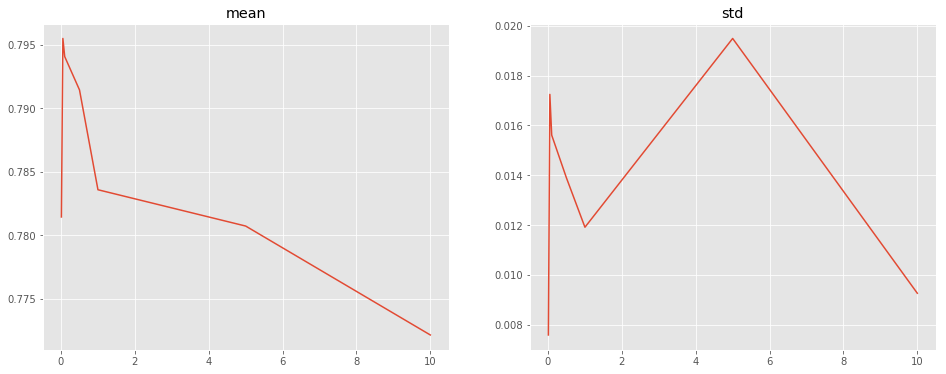

In [38]:
# строим графики: значение метрики и ошибка. Визуализируем максимум.

# метрика
plt.figure(figsize = (16, 6))
plt.subplot(1,2,1)
plt.plot([optimizer_mean.grid_scores_[i][0].values() for i in range(7)], [optimizer_mean.grid_scores_[i][1] for i in range(7)])
plt.title('mean')

# ошибка
plt.subplot(1,2,2)
plt.plot([optimizer_mean.grid_scores_[i][0].values() for i in range(7)], [optimizer_mean.grid_scores_[i][2].std() for i in range(7)])
plt.title('std')

In [39]:
def plot_scores_My(optimizer):
    plt.figure(figsize = (16, 6))
    plt.semilogx([optimizer.grid_scores_[i][0]['C'] for i in range(7)], [optimizer.grid_scores_[i][1] for i in range(7)])
    plt.fill_between([optimizer.grid_scores_[i][0]['C'] for i in range(7)], 
                     [optimizer.grid_scores_[i][1] - optimizer.grid_scores_[i][2].std() for i in range(7)],
                     [optimizer.grid_scores_[i][1] + optimizer.grid_scores_[i][2].std() for i in range(7)], alpha=0.3)
    plt.title('mean +- std')
    return plt.show()

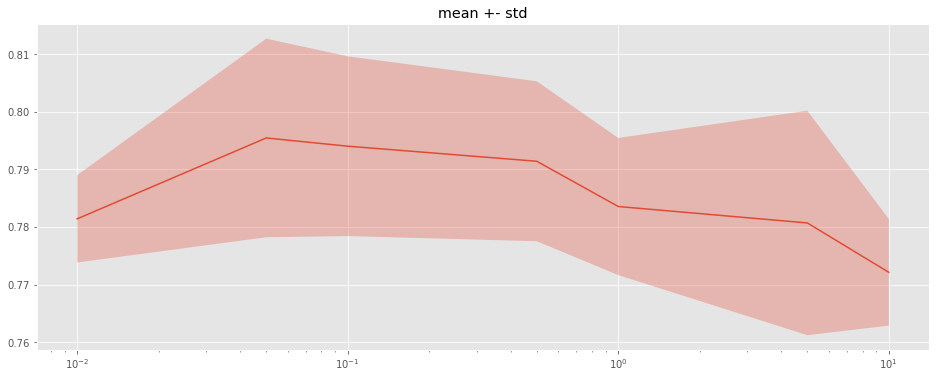

In [41]:
plot_scores_My(optimizer)

Построим две метрики качества AUC ROC на тестовой выборке и сравним их между собой

1) с нулевыми пропусками

In [53]:
AUC_ROC_0 = roc_auc_score(y_test, optimizer.predict(X_test_zeros_cat))
AUC_ROC_0

0.80956529163485547

2) со средними пропусками

In [50]:
AUC_ROC_M = roc_auc_score(y_test, optimizer.predict(X_test_mean_cat))
AUC_ROC_M

0.80633074759543688

Вывод: дальше работаем с нулевыми пропусками